## Importing all the required libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('./data/daily-minimum-temperatures-in-me.csv')

In [38]:
df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [39]:
## Setting index

df.set_index(df.columns[0], inplace=True)

df.head()

,Daily minimum temperatures
Date,
1/1/1981,20.7
1/2/1981,17.9
1/3/1981,18.8
1/4/1981,14.6
1/5/1981,15.8


In [40]:
df.columns = ['values']

In [41]:
df['values'] = pd.to_numeric(df['values'], errors='coerce')

<Axes: xlabel='Date'>

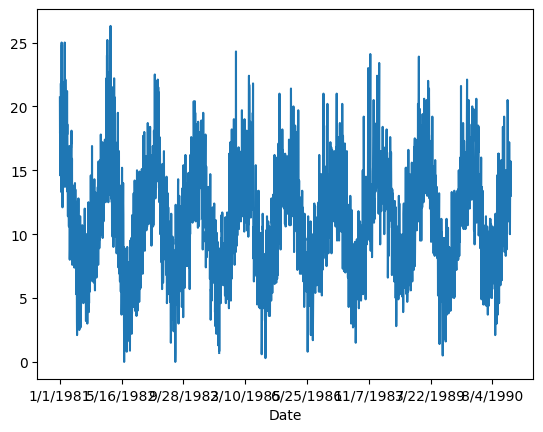

In [42]:
df['values'].plot()

In [43]:
df.index

Index(['1/1/1981', '1/2/1981', '1/3/1981', '1/4/1981', '1/5/1981', '1/6/1981',
       '1/7/1981', '1/8/1981', '1/9/1981', '1/10/1981',
       ...
       '12/22/1990', '12/23/1990', '12/24/1990', '12/25/1990', '12/26/1990',
       '12/27/1990', '12/28/1990', '12/29/1990', '12/30/1990', '12/31/1990'],
      dtype='object', name='Date', length=3650)

In [46]:
# Using plotly.express
import plotly.express as px

fig = px.line(df, x=df.index, y="values")
fig.show()

In [47]:
fig = px.bar(df, x=df.index, y="values")
fig.show()

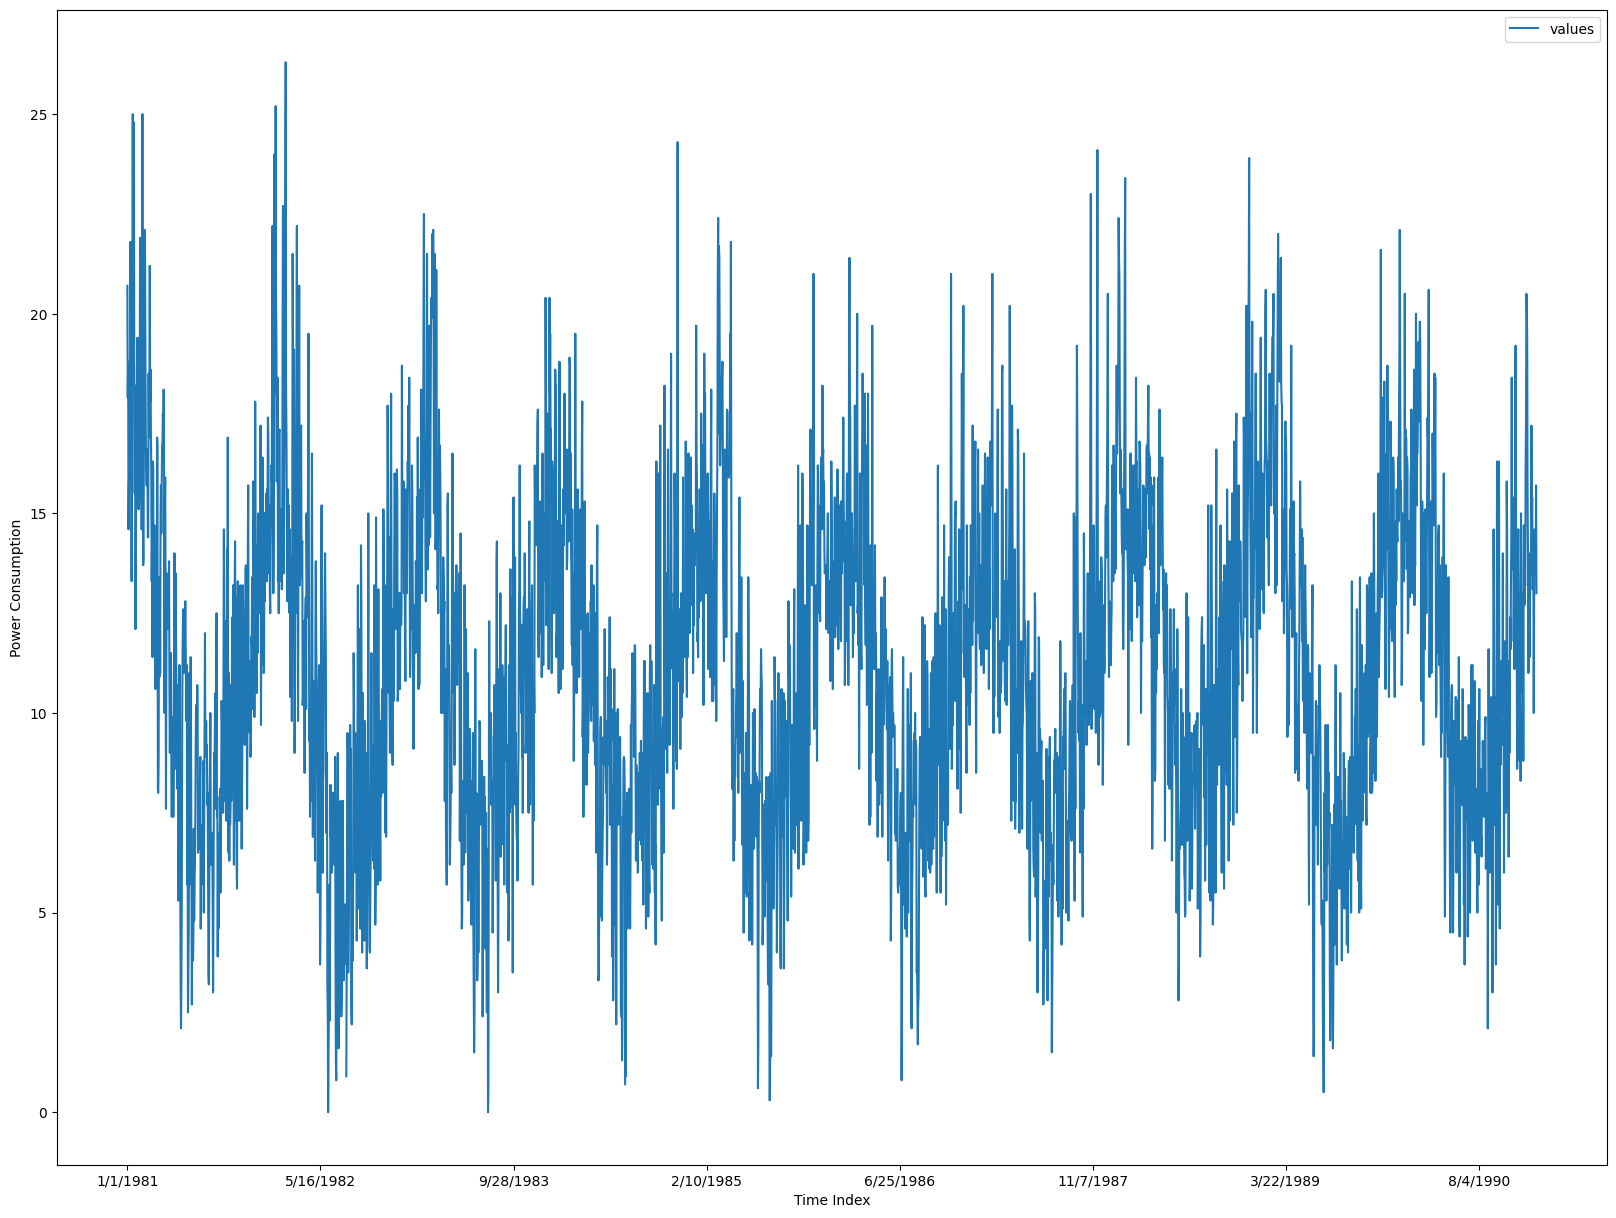

In [50]:
plt.rcParams['figure.figsize'] = (20, 15)

df.plot()

plt.xlabel("Time Index")
plt.ylabel("Power Consumption")
plt.show()

## Hypothesis Testin: If the Time Series is Stationary or Trending

In [51]:
import statsmodels.api as sm

def Dickey_Fuller_test(ts,significances_level = 0.05):
    p_value = sm.tsa.stattools.adfuller(ts)[1]
    if p_value <= significances_level:
        print("Time Series is Stationary")
    else:
        print("Time Series is NOT Stationary")
    print("P_value is: ", p_value)

In [56]:
df.fillna(0,inplace=True)

In [57]:
print(Dickey_Fuller_test(df['values'],significances_level = 0.05))

Time Series is Stationary
P_value is:  0.00024612702549050956
None


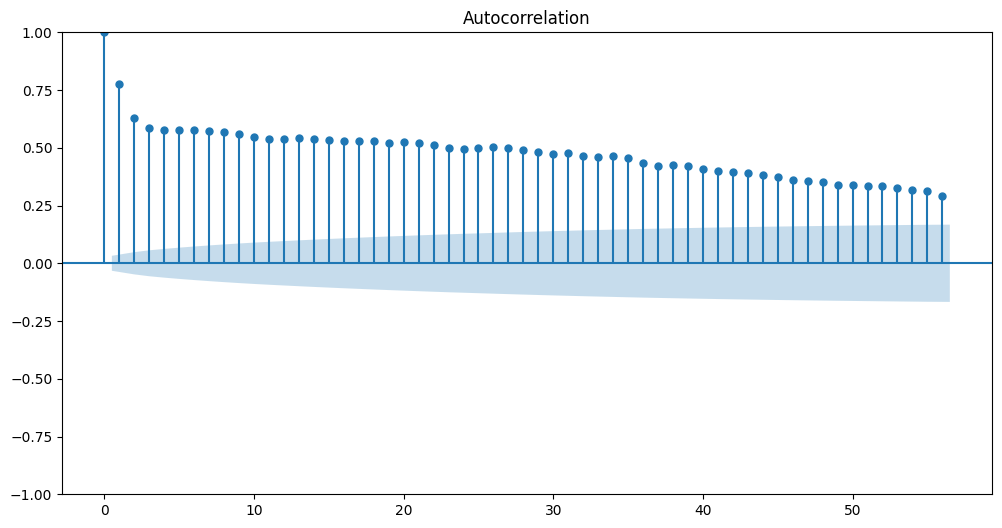

In [58]:
# using auto correlation function plot , to varify the period 

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.rcParams['figure.figsize'] = (12, 6)
plot_acf(df,lags=56);

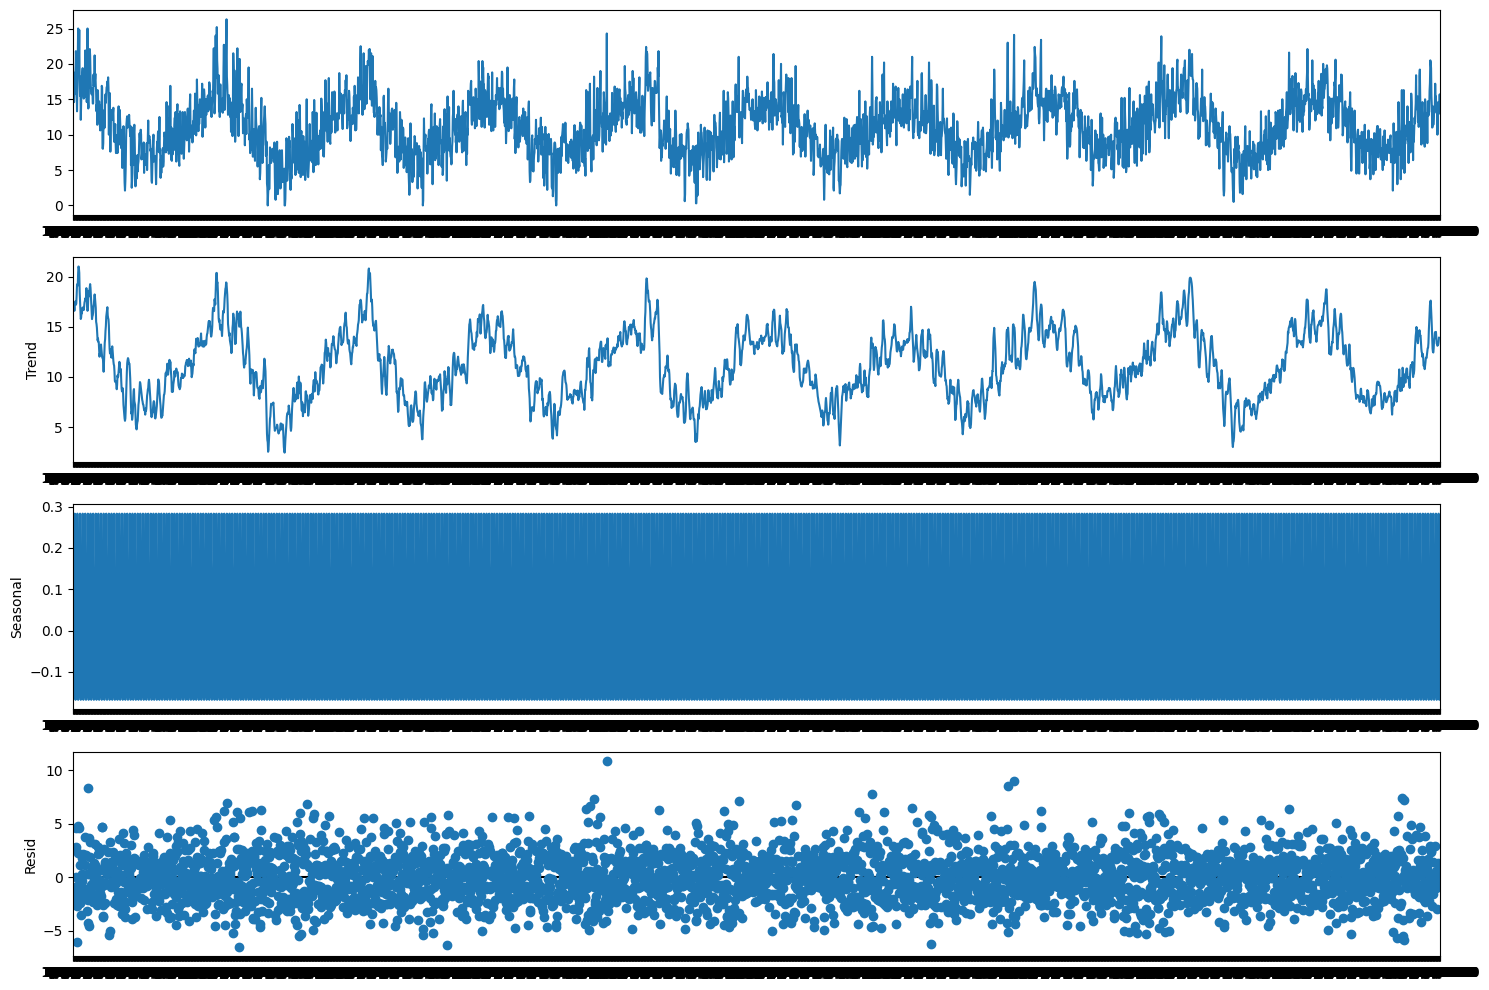

In [59]:
plt.rcParams['figure.figsize'] = (15, 10)

Decomposition_model = sm.tsa.seasonal_decompose(df, model='additive',period=7)
Decomposition_model.plot();

## Forecasting

In [61]:
# 1. Trying out exponential smoothing

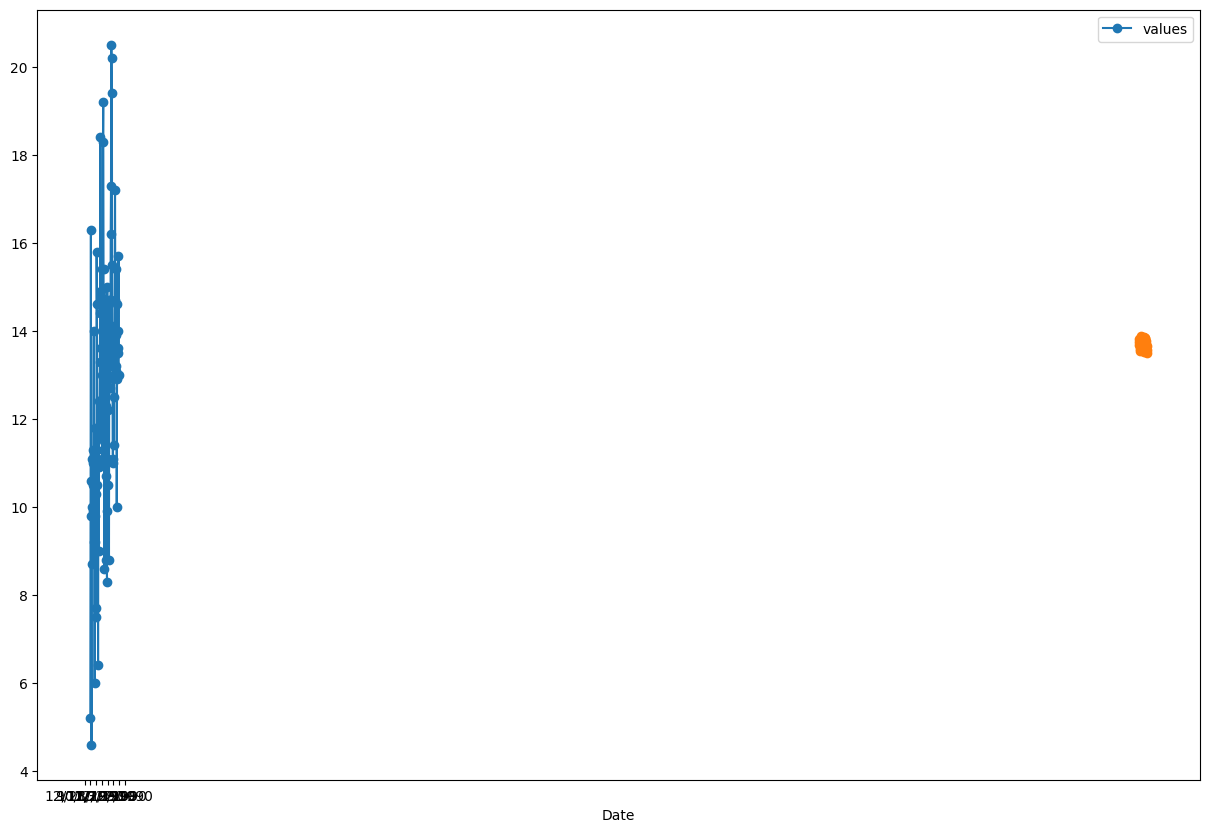

In [65]:
import warnings
warnings.filterwarnings('ignore')

model = sm.tsa.ExponentialSmoothing(df, seasonal='add',trend="add", seasonal_periods= 12)
model = model.fit()
                                                     # default values
                                                     # of smoothing_level, seasonal_smoothing and 
                                                     # and trend smoothing
    
df.tail(100).plot(style='-o', label='actual')
model.forecast(30).plot(style='-o', label='predicted')

plt.show()